In [2]:
import os
HOME = os.getcwd()
print(HOME) 


/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="J2QZBJqEOyk5GAobPfPV")
project = rf.workspace("ml-x00sj").project("weapon-detection-2-w6pvz")
dataset = project.version(3).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.148, to fix: `pip install ultralytics==8.0.134`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format


Extracting Dataset Version Zip to Weapon-Detection-2-3 in yolov8:: 100%|██████████| 2764/2764 [00:00<00:00, 3259.55it/s]


In [8]:
%cd {HOME}

#before this step go to /content/datasets/Weapon-Detection-2-3/data.yaml and add this line at the end of the file: "path: /content/datasets" without the quotation marks and then save the file

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Weapon-Detection-2-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

/content


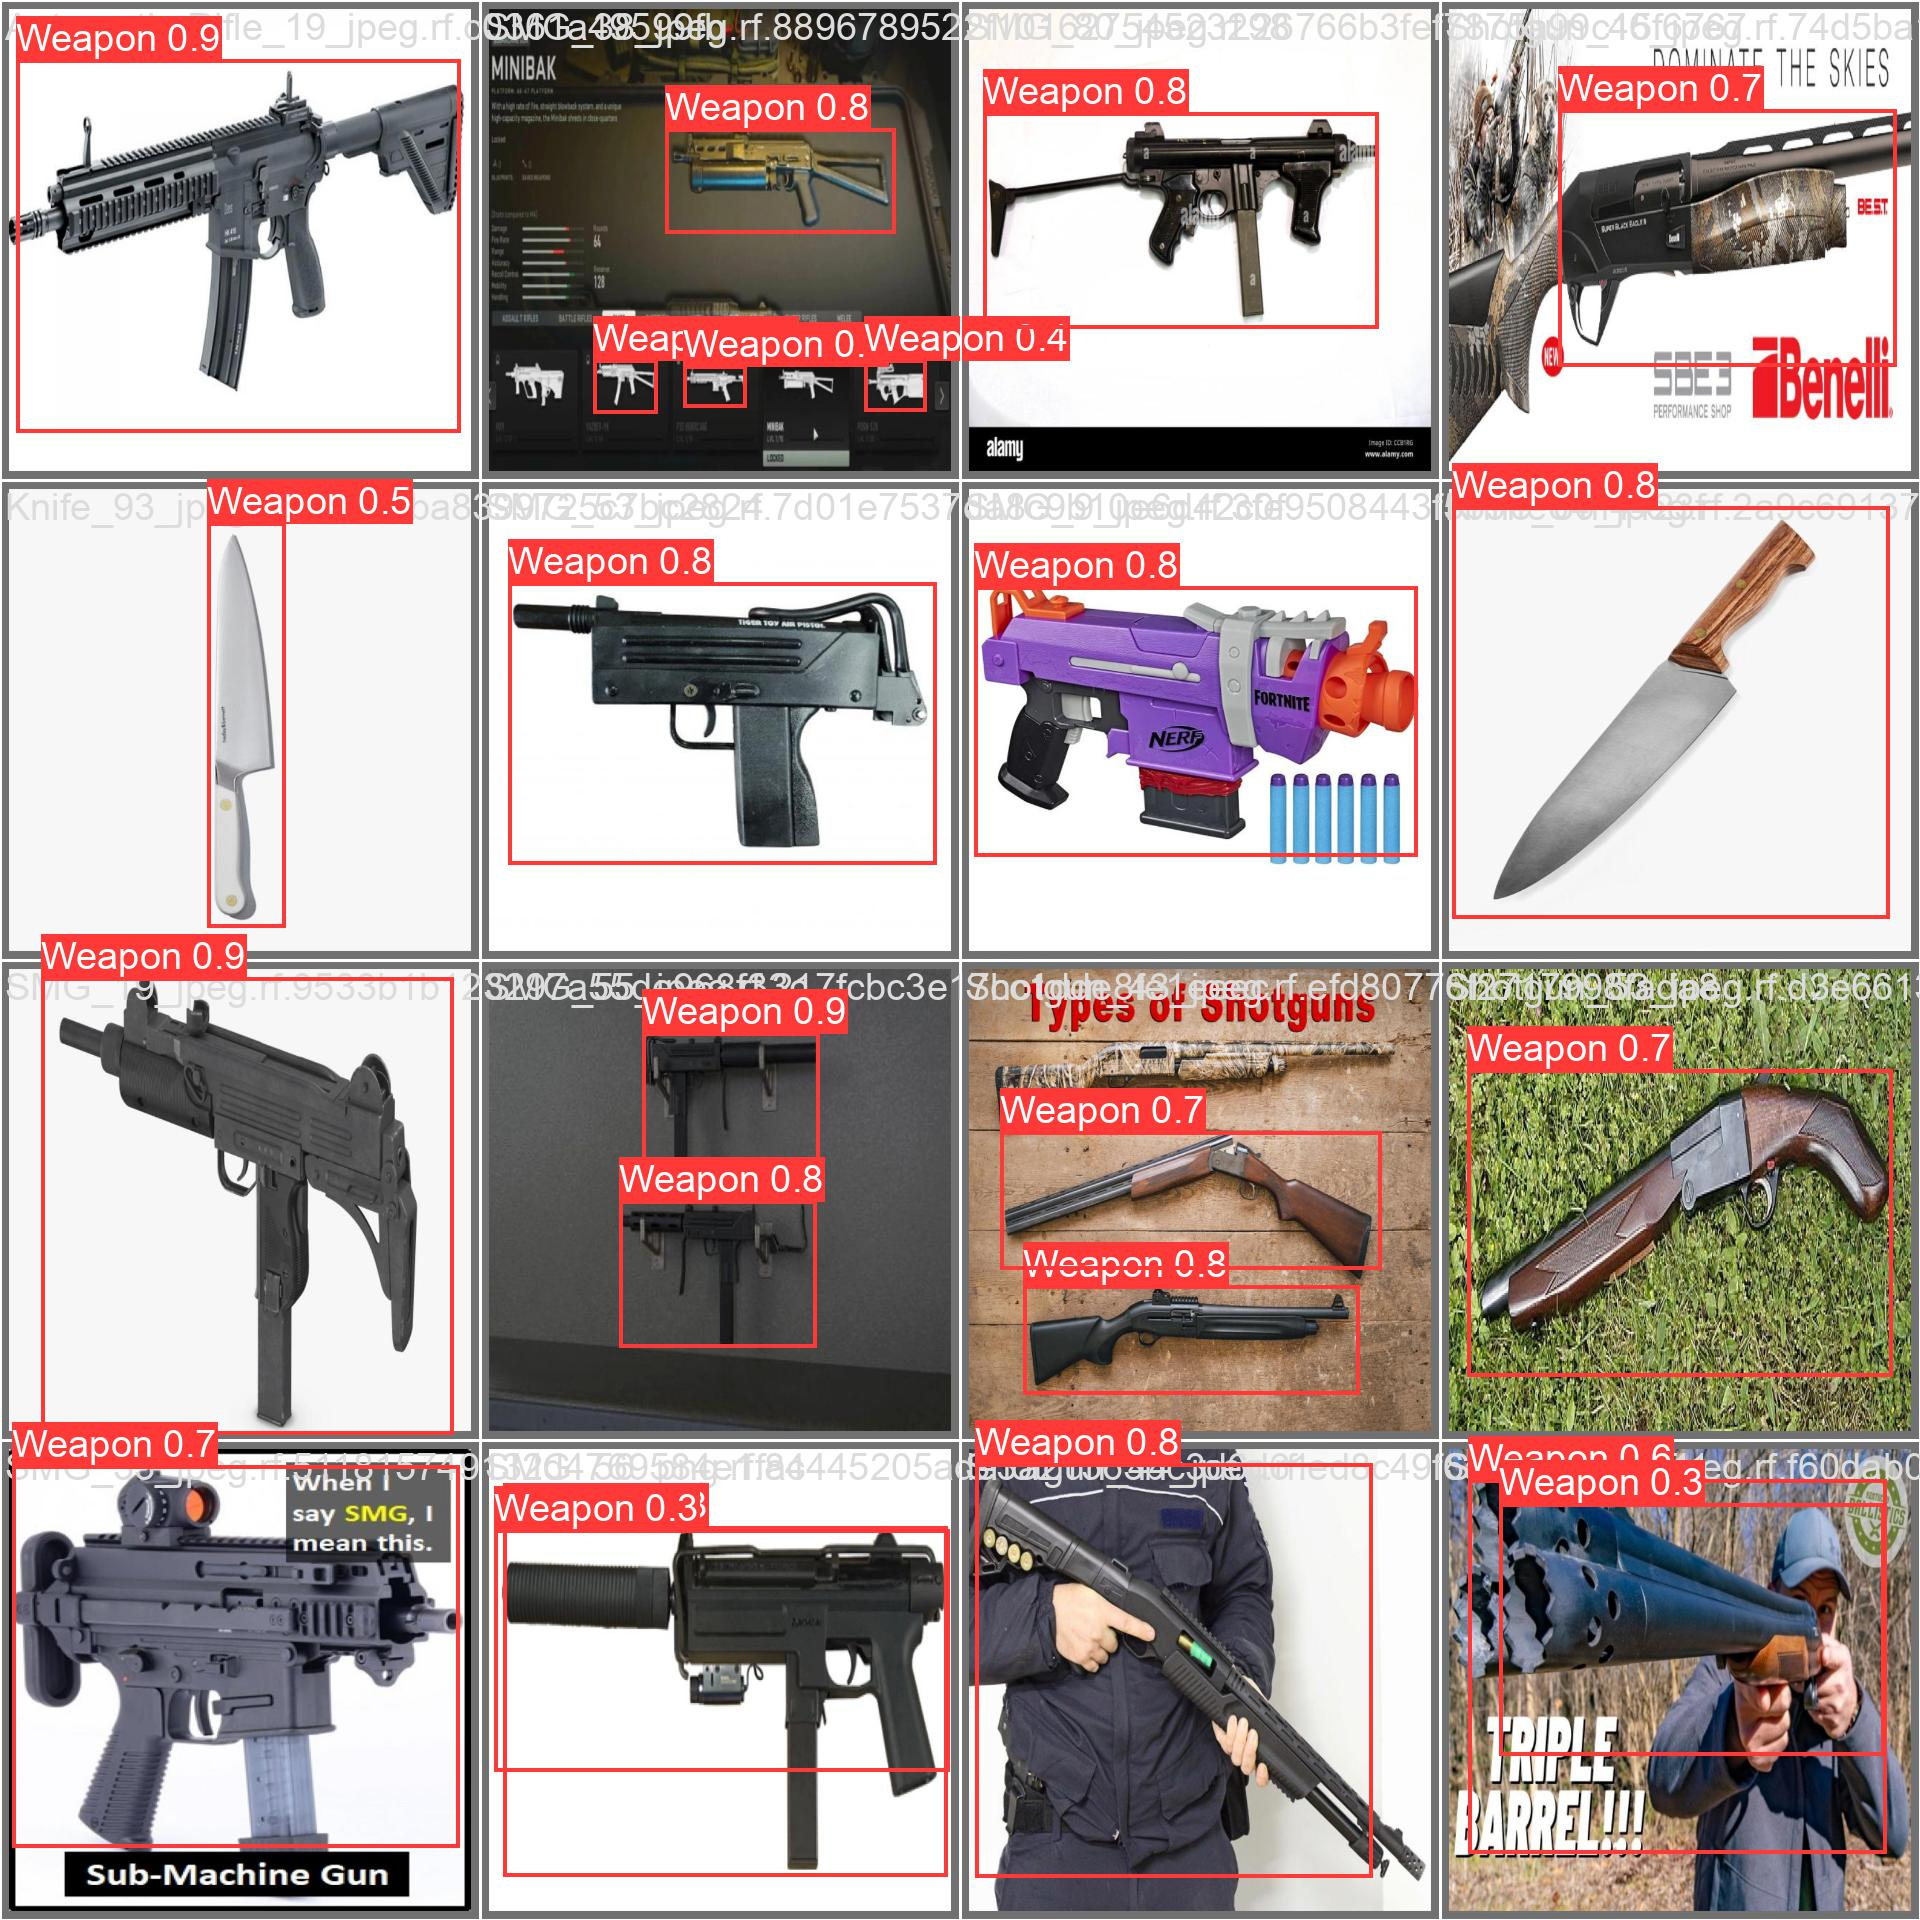

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/5 /content/datasets/Weapon-Detection-2-3/test/images/army_jpg.rf.8451067419c469bd31ec6693e6257128.jpg: 800x800 (no detections), 10.0ms
image 2/5 /content/datasets/Weapon-Detection-2-3/test/images/terrorists2_jpg.rf.f210bc7e11357fb9e37bc4c9c4fcb6ab.jpg: 800x800 5 Weapons, 10.0ms
image 3/5 /content/datasets/Weapon-Detection-2-3/test/images/terrorists_jpg.rf.52b935eaad8bb505897ad621bffe1b8c.jpg: 800x800 3 Weapons, 10.0ms
image 4/5 /content/datasets/Weapon-Detection-2-3/test/images/weapons2_jpg.rf.f99e500c0d3ebefd9e764a1692f76b05.jpg: 800x800 1 Weapon, 10.0ms
image 5/5 /content/datasets/Weapon-Detection-2-3/test/images/weapons_jpg.rf.ab1c7928aa2fe3f9dfd6989192cbdbbb.jpg: 800x800 3 Weapons, 9.9ms
Speed: 5.0ms preprocess, 10.0ms inference, 21.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect

/content


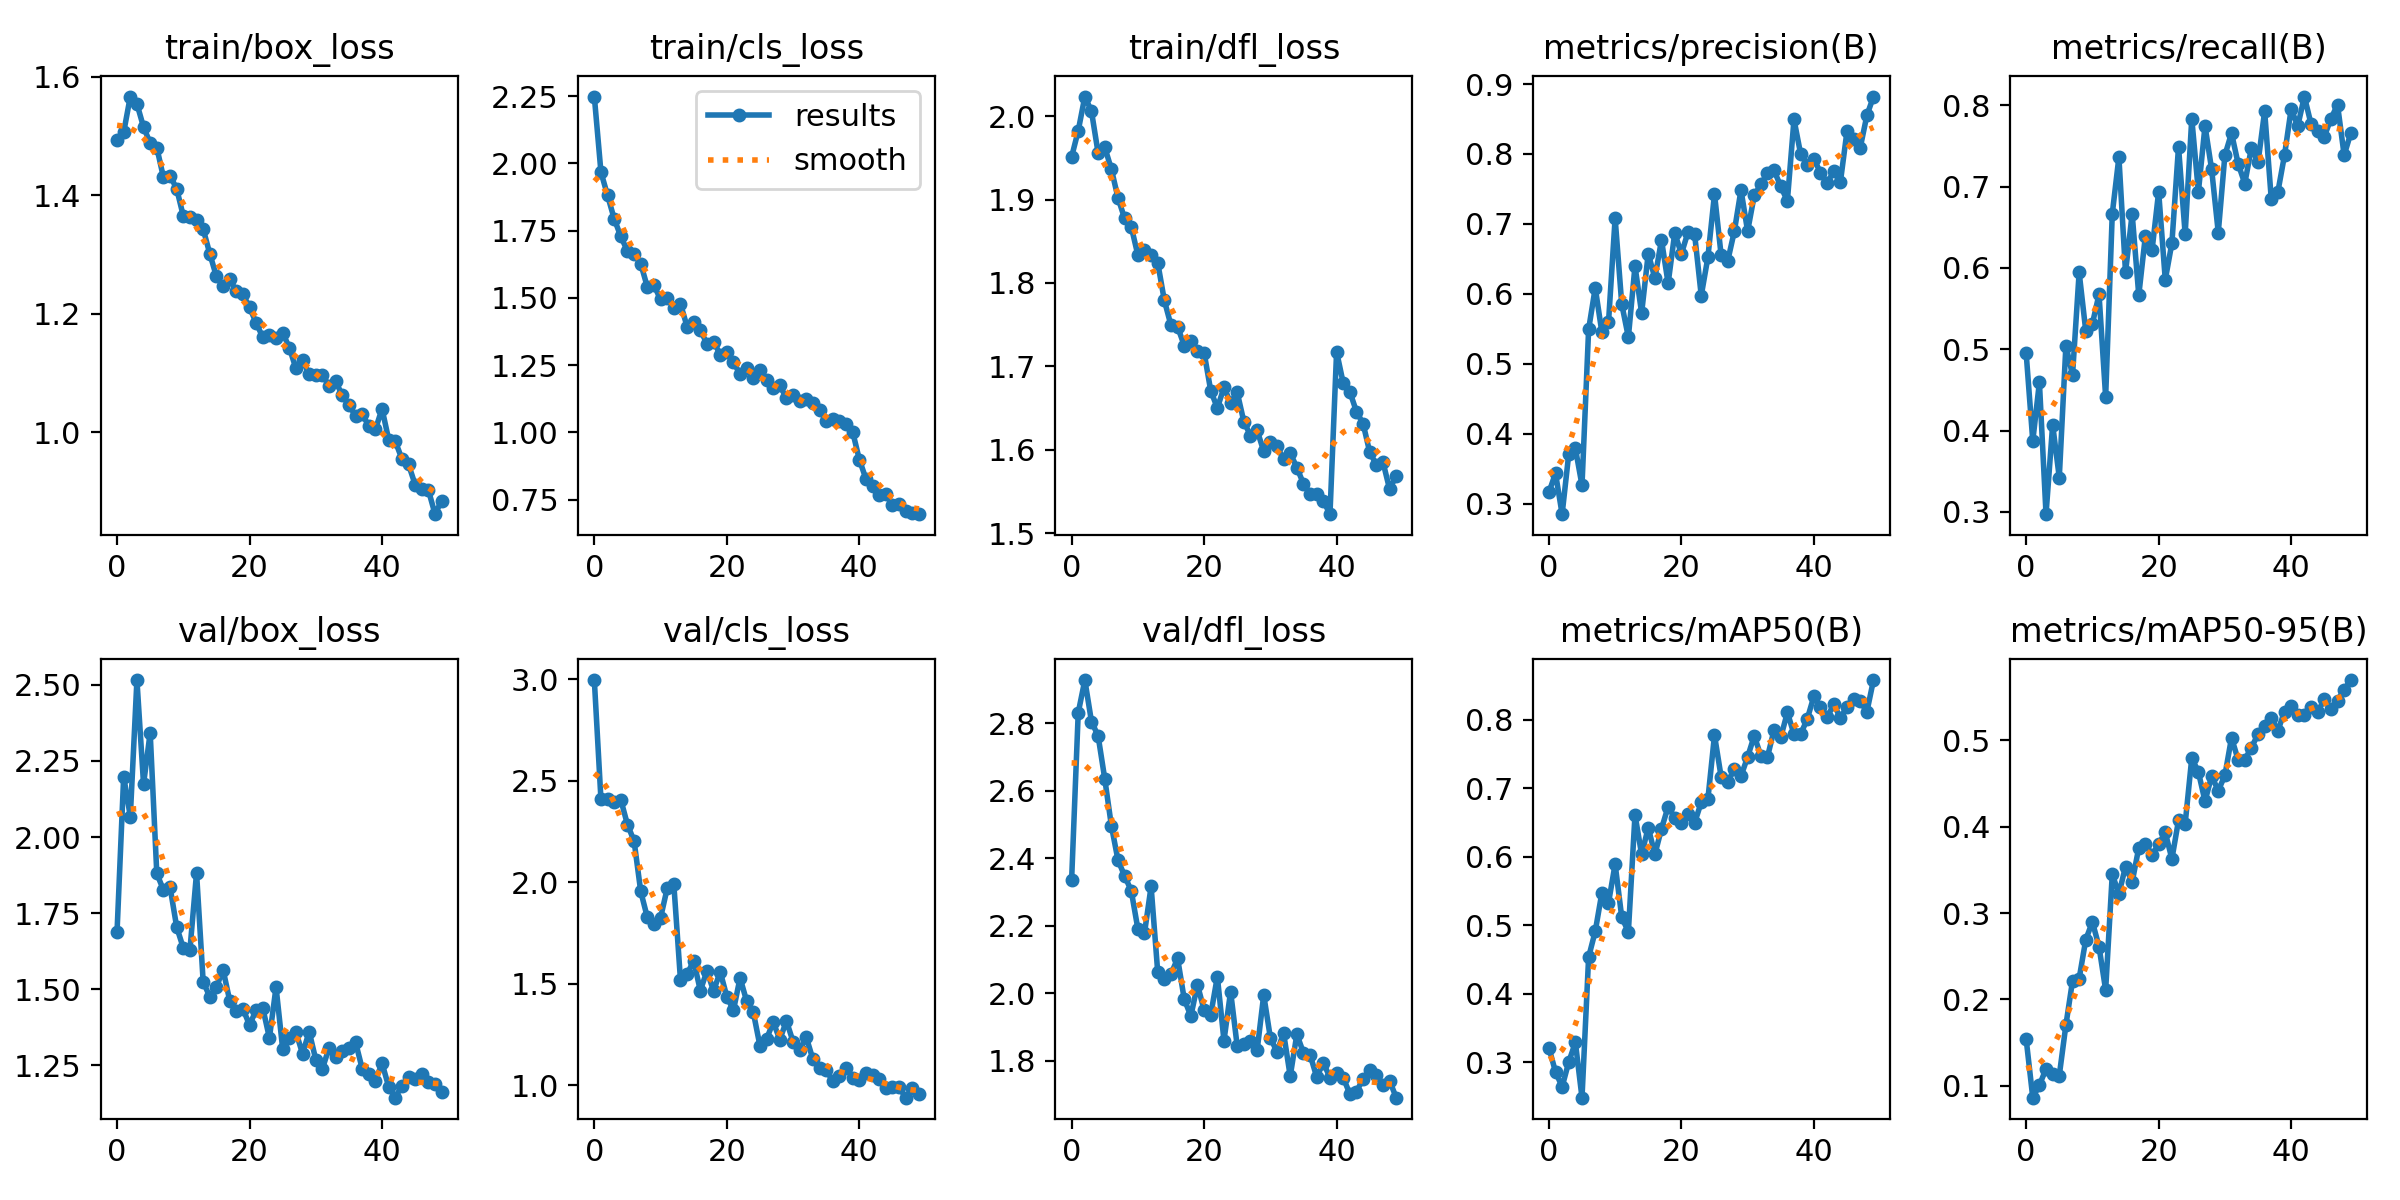

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


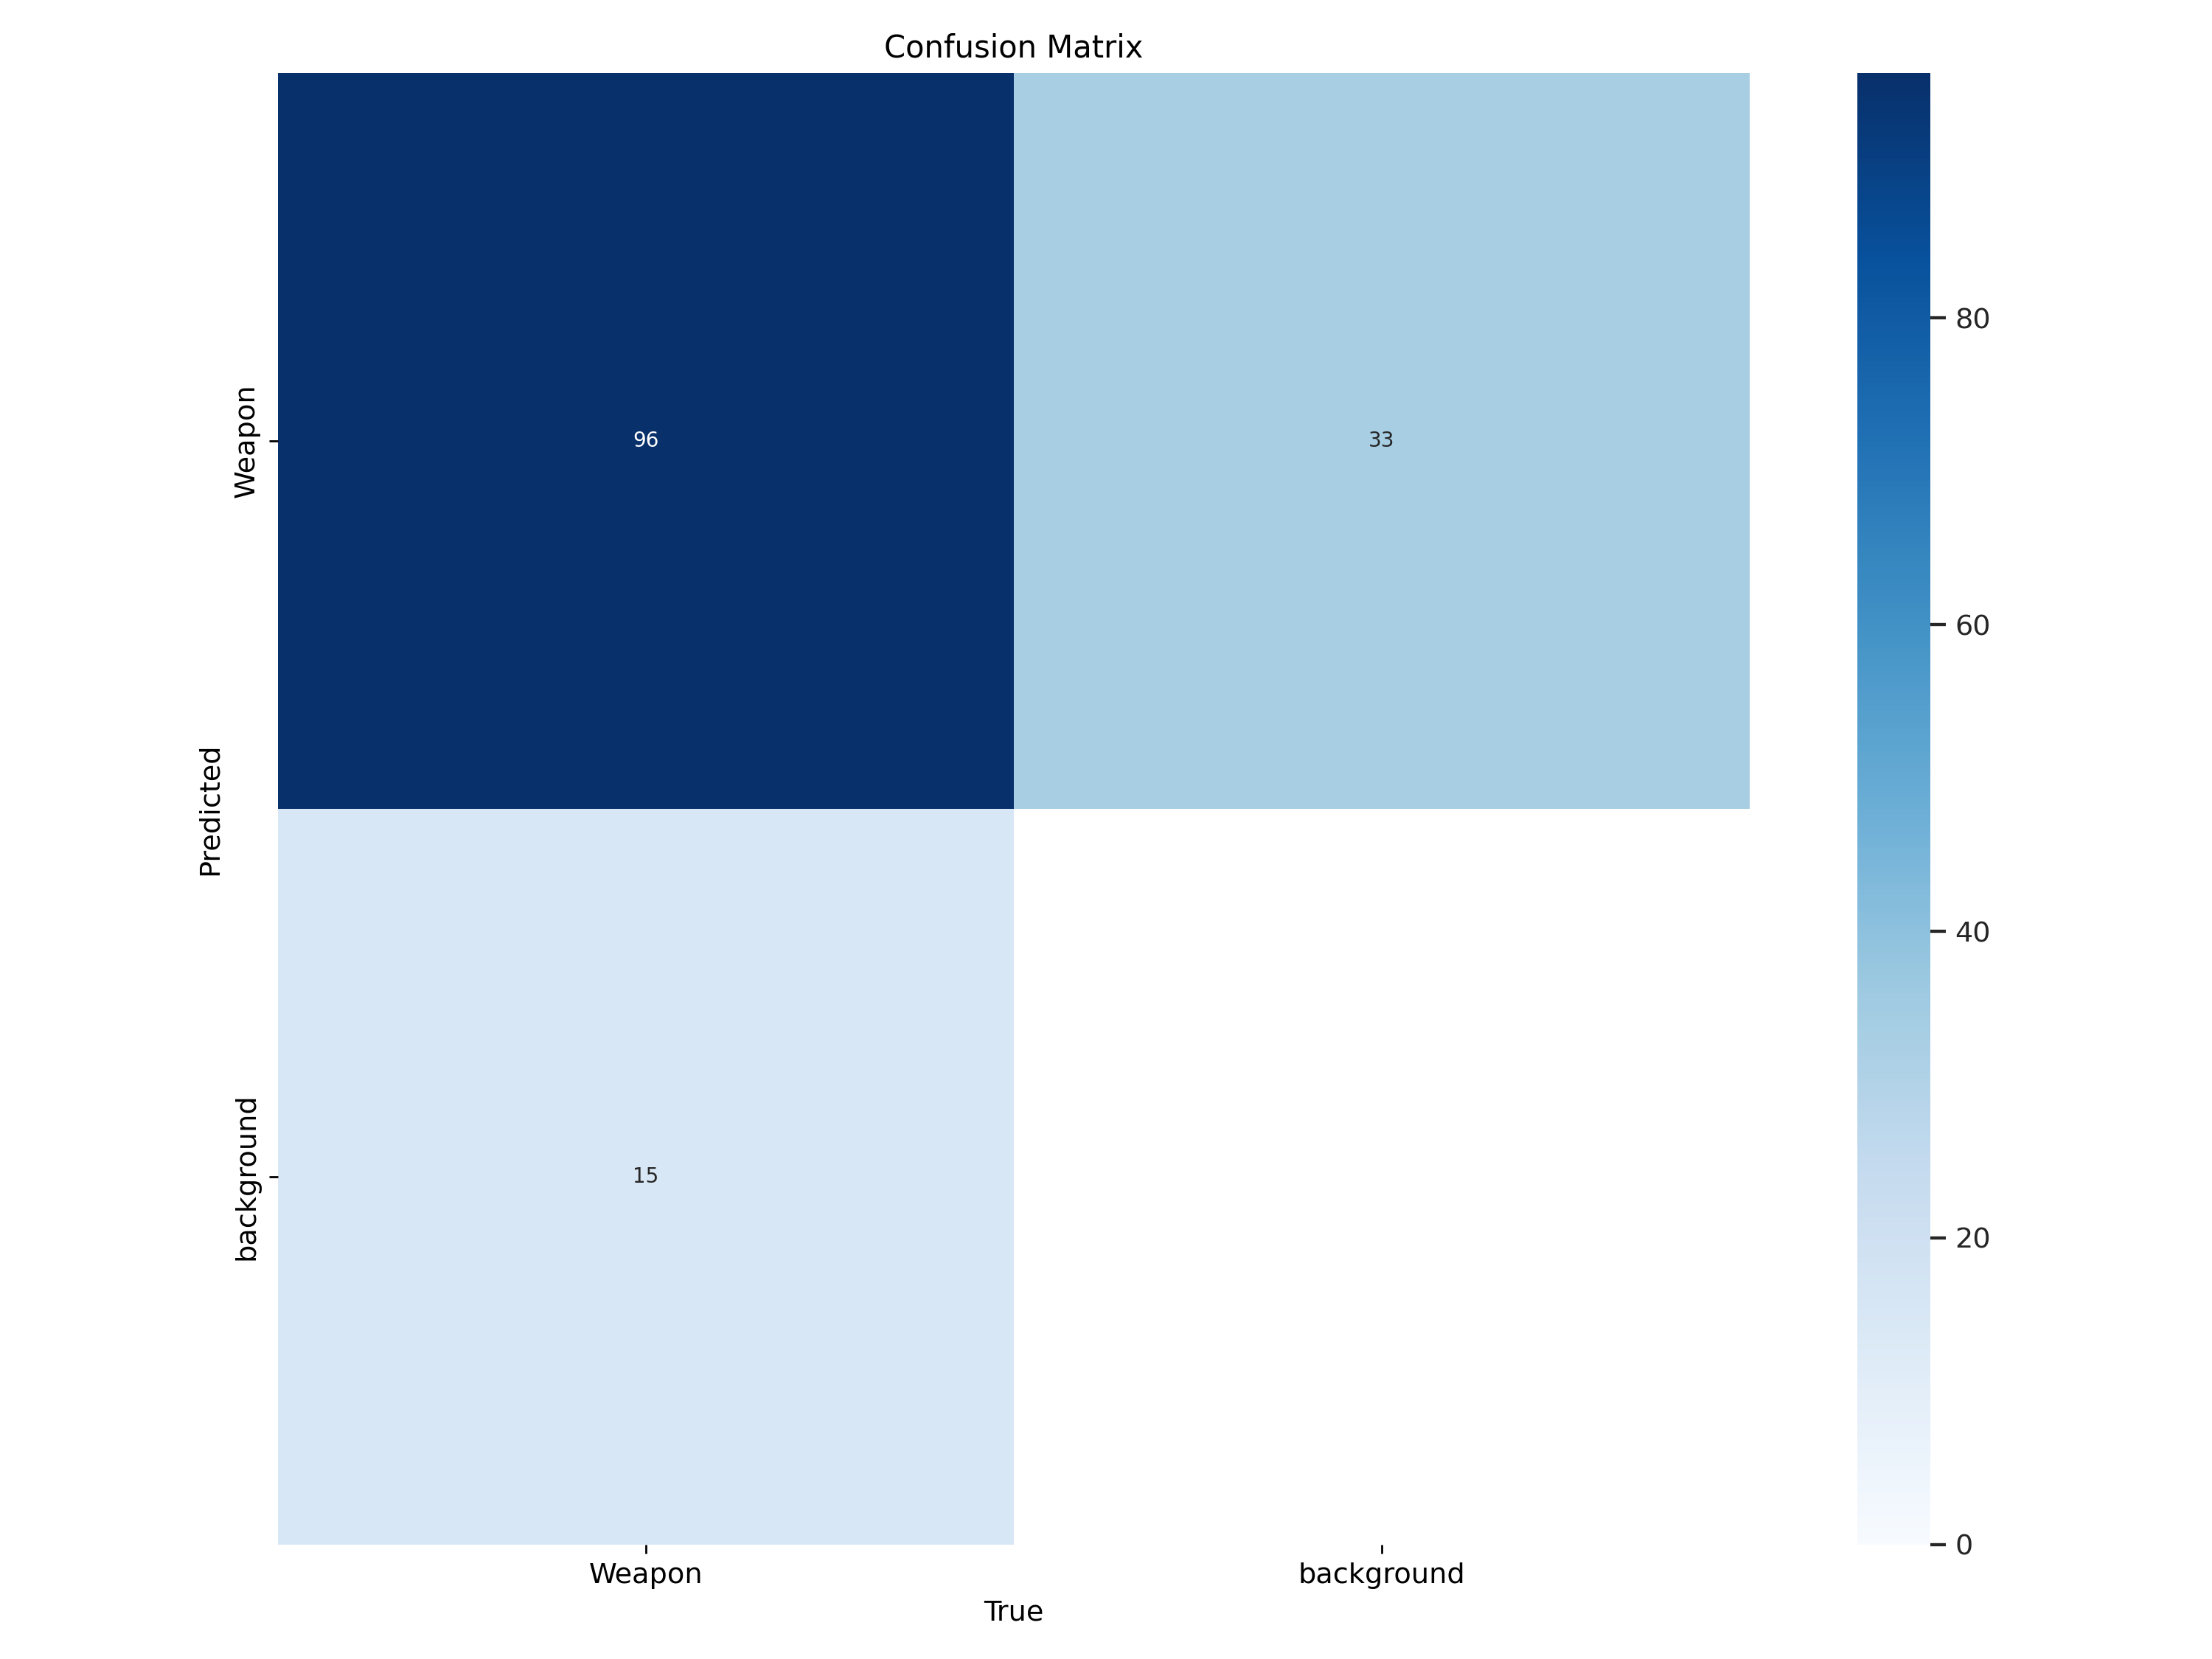

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [15]:
!yolo export model='/content/runs/detect/train3/weights/best.pt' format=tflite

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from '/content/runs/detect/train3/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 5, 13125) (6.0 MB)
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.9/372.9 kB 294.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 112.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 212.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [16]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.134 is required but found version=8.0.148, to fix: `pip install ultralytics==8.0.134`
View the status of your deployment at: https://app.roboflow.com/ml-x00sj/weapon-detection-2-w6pvz/3
Share your model with the world at: https://universe.roboflow.com/ml-x00sj/weapon-detection-2-w6pvz/model/3
